In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
from nltk import sent_tokenize
from tqdm import tqdm
import random

from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [5]:
dataset = pd.read_csv('../data/papers_dataset.csv')
dataset.keywords = dataset.keywords.apply(ast.literal_eval)
dataset.sections = dataset.sections.apply(ast.literal_eval)

In [6]:
test_set = dataset[dataset.partition == 'test']
'''with open('./test_papers.txt', 'w', encoding='utf-8') as f:
    for _, row in test_set.iterrows():
        paper_id = row['paper_id']
        num_keywords = len(row['keywords'])
        sections = ' '.join(row['sections'].values())
        text = row['abstract'] + ' ' + sections
        f.write(f'{paper_id}\t{num_keywords}\t{text}\n')'''

"with open('./test_papers.txt', 'w', encoding='utf-8') as f:\n    for _, row in test_set.iterrows():\n        paper_id = row['paper_id']\n        num_keywords = len(row['keywords'])\n        sections = ' '.join(row['sections'].values())\n        text = row['abstract'] + ' ' + sections\n        f.write(f'{paper_id}\t{num_keywords}\t{text}\n')"

In [ ]:
num_sent_list = []

for row in tqdm(dataset.iterrows()):
    num_sent = len(sent_tokenize(row[1]['abstract']))
    sections = list(row[1]['sections'].values())
    for section in sections:
        num_sent += len(sent_tokenize(section))
    num_sent_list.append(num_sent)

In [42]:
int(np.ceil(125/3))

42

In [38]:
for _, row in test_set.iterrows():
    sections_text = ' '.join(row['sections'].values())
    text = row['abstract'] + ' ' + sections_text
    
    num_sent = len(sent_tokenize(row['abstract']))
    sections = list(row['sections'].values())
    for section in sections:
        num_sent += len(sent_tokenize(section))
    
    print(len(sent_tokenize(text)), len(sent_tokenize(row['abstract'])) + len(sent_tokenize(sections_text)), num_sent)

76 76 76
96 96 99
203 203 203
59 59 60
118 118 124
185 185 186
131 131 131
125 125 126
66 66 68
103 103 103
45 45 45
160 160 160
135 135 136
119 119 119
97 97 99
198 198 199
49 50 50
109 109 110
66 66 68
151 151 151
134 134 135
135 135 149
111 111 112
61 61 62
76 76 76
147 147 149
89 89 91
71 71 72
88 88 88
80 80 89
90 90 91
170 170 171
164 164 164
107 107 108
175 175 175
126 126 128


In [7]:
test_set

,paper_id,category,name,num_pages,num_formulas,num_figures,title,keywords,abstract,sections,num_sentences,sent_by_page,partition
1,paper_1,Artificial Intelligence,A Model for Clustering Social Media Data for E...,4,0,4,A Model for Clustering Social Media Data for E...,"[Social Media, Twitter Application Programming...","Through Social media, people are able to write...",{'Introduction': 'Clustering is a descriptive ...,76,25.333333,test
2,paper_2,Artificial Intelligence,An Intelligent System for Traffic Control in S...,8,5,9,An Intelligent System for Traffic Control in S...,"[Smart Cities, Traffic Congestion, Intelligent...",Current traffic light systems use a fixed time...,"{'Introduction': '', 'Background': 'Traffic co...",99,14.142857,test
3,paper_3,Artificial Intelligence,Architecture Trends of Adaptive Educational Hy...,14,0,12,Architecture Trends of Adaptive Educational Hy...,"[Adaptive Educational Hypermedia Systems, Arch...",The aim of this article is to present the gene...,{'Introduction': 'Adaptive Hypermedia Educatio...,203,15.615385,test
21,paper_21,Computer Science and Technology,A New Powerful Scheme Based on Self Invertible...,5,1,2,A New Powerful Scheme Based on Self Invertible...,"[Minimum Distance, Minimum Weight, BCH Codes, ...","In this paper, we present the powerful scheme ...",{'Introduction': 'In telecommunication and sto...,60,15.000000,test
31,paper_31,Computer Science and Technology,Design and Implementation of Intelligent Medic...,6,2,10,Design and Implementation of Intelligent Medic...,"[Smart Medical Care, ZigBee, Semantic Matching]",With the continuous improvement of human livin...,"{'Introduction': 'From 1990 to 2017, the morbi...",124,24.800000,test
38,paper_38,Computer Science and Technology,Predicting Students’ First-Year Academic Perfo...,13,1,11,Predicting Students' First-Year Academic Perfo...,"[Ordinary Level, Unified Tertiary Matriculatio...",The study aimed to determine if any of the ent...,{'Introduction': 'Education is an essential is...,186,15.500000,test
57,paper_57,Control and Intelligent Systems,Ant Colony Optimization with Genetic Operation...,6,6,15,Ant colony optimization with genetic operations,"[Ant Colony Optimization, Genetic Operations, ...",This paper attempts to overcome stagnation pro...,{'Introduction': 'Wide range of problems like ...,131,26.200000,test
78,paper_78,Control and Intelligent Systems,Fuzzy C-means Clustering Applied to the Classi...,5,8,2,Fuzzy C-means Clustering Applied to the Classi...,"[Fuzzy Set Theory, Numerical Classification, L...",Fuzzy C-means clustering is a soft technique a...,"{'Introduction': 'Quantitative methods, such a...",126,31.500000,test
96,paper_96,Control and Intelligent Systems,On the Warning System of Obstacle Avoidance of...,4,0,1,On the warning system of obstacle avoidance of...,"[Embedded System, Electronic Guide Dog, Avoidi...",With the rapid development of China's transpor...,"{'Introduction': 'During last summer, I went b...",68,22.666667,test
134,paper_134,Data Mining and Knowledge Discovery,Data Mining Technique Used in Order to Analysi...,6,0,7,Data Mining Technique Used in Order to Analysi...,"[Data Mining, Regression, Olive Oil, Authentic...","Data mining, also referred to as knowledge ext...",{'Introduction': 'New information and communic...,103,20.600000,test


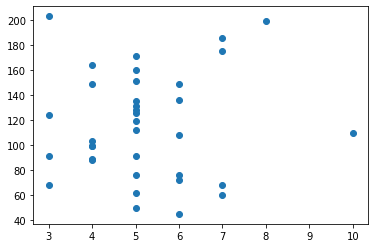

In [8]:
plt.scatter([len(i) for i in test_set.keywords], test_set.num_sentences)

In [25]:
temp_df = test_set[['keywords', 'num_sentences']]
temp_df['num_keywords'] = [len(i) for i in test_set.keywords]
temp_df['sent_per_keyword'] = temp_df.num_sentences // temp_df.num_keywords
temp_df['sent_one_third'] = temp_df.num_sentences // 3
temp_df['summary_len'] = temp_df.num_keywords * (temp_df.num_sentences // temp_df.num_keywords // 3)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [26]:
temp_df

,keywords,num_sentences,num_keywords,sent_per_keyword,sent_one_third,summary_len
1,"[Social Media, Twitter Application Programming...",76,5,15,25,25
2,"[Smart Cities, Traffic Congestion, Intelligent...",99,4,24,33,32
3,"[Adaptive Educational Hypermedia Systems, Arch...",203,3,67,67,66
21,"[Minimum Distance, Minimum Weight, BCH Codes, ...",60,7,8,20,14
31,"[Smart Medical Care, ZigBee, Semantic Matching]",124,3,41,41,39
38,"[Ordinary Level, Unified Tertiary Matriculatio...",186,7,26,62,56
57,"[Ant Colony Optimization, Genetic Operations, ...",131,5,26,43,40
78,"[Fuzzy Set Theory, Numerical Classification, L...",126,5,25,42,40
96,"[Embedded System, Electronic Guide Dog, Avoidi...",68,7,9,22,21
134,"[Data Mining, Regression, Olive Oil, Authentic...",103,4,25,34,32


In [53]:
def term_freq(k, wordlist):
    """
    takes review_id and wordlist and computes the term frequency
    """
    tf = dict()
    for term in wordlist:
        tf[term] = tf.get(term, 0.0) + 1.0
    return k, tf

def idf(n, docfreq):
    """ Compute the IDF """
    return numpy.log10(numpy.reciprocal(docfreq) * n)


def read_doc(line):
    """ Read one line from review file and split it into Multiple lines and convert it into wordlist for each line
        Note: Removed sentences with less than 6 words and words with less than 4 characters """
    lmtz = WordNetLemmatizer()
    sw = stopwords.words('english')
    review = line.split("\t")
    review_id = review[0]
    sentences = sent_tokenize(review[-1])
    result = []
    for idx, sent in enumerate(sentences):
        sent_id = review_id + '_' + str(idx)
        sent_len = len(sent.split(" "))
        #if 10 < sent_len < 30:
        words = re.findall(r'[a-zA-Z]+', sent)
        words = [lmtz.lemmatize(w.lower()) for w in words if w.lower() not in sw]
        words = [w for w in words if len(w) > 3]
        result.append((sent_id, words))
    return result

def read_reviews(line):
    """ Read one line from review file and split it into enumerated review id and review sentences tuple"""
    review = line.split("\t")
    review_id = review[0]
    sentences = review[5].split(".")
    result = []
    for idx, sent in enumerate(sentences):
        sent_id = review_id + '_' + str(idx)
        result.append((sent_id, sent))
    return result

def extract_sentences(VT, reviews, columnheader, k=10, n=5):
    """
    Returns a list of summary from VT matrix
    :param VT: Right Singular Matrix of SVD
    :param reviews: reviews RDD <reviewid, sentence>
    :param columnheader: reivew id
    :param k: no of concepts(rows in VT)
    :param n: no of review per concept
    """
    concepts = []
    # for idxs in numpy.argpartition(VT[:k,:], -n, 1)[:,-n:]:
    for idxs in numpy.fliplr(VT[:k,:].argsort()[:,-n:]):
        keysentences = []
        for idx in idxs:
            keysentences.append(reviews.lookup(columnheader[idx]))
        concepts.append(keysentences)
    return concepts

def extract_keywords(VT, rowheader, k = 10, n = 5):
    concepts = []
    for idxs in numpy.fliplr(VT[:k,:].argsort()[:,-n:]):
        keywords = []
        for idx in idxs:
            keywords.append(rowheader[idx])
        concepts.append(keywords)
    return concepts

In [51]:
with open('./test_papers.txt', 'r', encoding='utf-8') as f:
    documents = [read_doc(paper.strip()) for paper in f.readlines()]

# Term Frequency
tf = map(lambda k, wordlist: tfidf2.term_freq(k, wordlist), documents)
#tf = [term_freq(k, wordlist) for k, wordlist in documents]